## Softmax Regression

### Multinomial Classification
* 여러 클래스를 분류하는 방법
    * 이진 분류기를 여러번 쓰는 방법에 비해 행렬 연산을 하는 것이 효과적
* 이진 분류기를 여러번 쓰는 것
    * 클래스 A 모델:
    $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{a1} \\ w_{a2}\end{bmatrix}
    = \begin{bmatrix}w_{a1}x_1 +w_{a2}x_2\end{bmatrix}$
    * 클래스 B 모델:
    $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{b1} \\ w_{b2}\end{bmatrix}
    =\begin{bmatrix}w_{b1}x_1 +w_{b2}x_2\end{bmatrix}$
    * 클래스 C 모델:$\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{c1} \\ w_{c2}\end{bmatrix}
    =\begin{bmatrix}w_{c1}x_1 +w_{c2}x_2\end{bmatrix}$
* 하나의 행렬로 계산
    * $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{a1}  & w_{b1} & w_{c1} \\ w_{a2} & w_{b2} &w_{c2}  \end{bmatrix}
    = \begin{bmatrix}w_{a1}x_1 +w_{a2}x_2 & w_{b1}x_1 +w_{b2}x_2 & w_{c1}x_1 +w_{c2}x_2 \end{bmatrix}$

### Softmax 함수
* 다항 로지스틱 회귀
* Sigmoid 대신 Softmax 함수 사용
    * Softmax : 각 출력 값은 0~1 사이, 모든 클래스의 값의 합은 1
    * sigmoid 보다 좋은 이유 : 하나의 클래스가 높은 값을 갖으면 나머지 클래스는 아주 작은 값, 배타적
* $\displaystyle \hat{P_k} = \frac{e^{z_i}}{e^{z_0} + e^{z_1} + e^{z_2}... + e^{z_k}}= \frac{e^{z_i}}{\sum_{j=0}^ke^{z_k}}$

### Softmax Prediction
* Softmax 결과에서 확률이 가장 높은 클래스 반환
* $\hat{y} = argmax(\hat{p})$

### Cross Entropy
* 소프트 맥스의 비용함수 :
$\displaystyle J(\theta) =  -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^ky_k^{(i)}log(\hat{p_k})$
* 소프트맥스를 통과한 결과값은 어떤 특정한 클래스만 높은 값을 갖고 나머지 클래스는 아주 작은 값을 갖는다.
여기에 y는 정답 클래스인 경우만 1을 나머지는 0을 가지고 있으므로 소프트맥스를 통과한 결과와 y를 곱하는 것만으로도 정답만 값이 나오고 틀린 결과는 0에 가까울 수 밖에 없다. 그런데 소프트맥스를 통과한 값을 $log()$함수를 씌우면 그 반대의 결과가 나온다. 따라서 틀리면 큰값 맞으면 작은 값이 나오므로 비용함수로 적합하다.

### Gradient of Cross Entropy
* $\displaystyle \nabla J(\theta) = \frac{1}{m}\sum_{i=1}^m(\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)}$

Text(0.5, 1.0, 'Input')

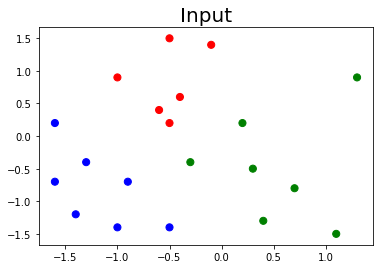

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


x_data = np.array([[-0.1, 1.4],
              [-0.5, 0.2],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.6, 0.2],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5, 1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-0.7],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5],
              [-1.6,-0.7],
              [-0.5,-1.4],
              [-1.0,-1.4]], dtype=np.float32)
y_label = np.array([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2])
y_data =  np.eye(3)[y_label]

colormap = np.array(['r', 'g', 'b'])
plt.scatter(x_data[:,0], x_data[:,1], s=50, c=colormap[y_label])
plt.title('Input', size=20)

step:0, cost:1.1828283071517944
step:200, cost:0.9239997863769531
step:400, cost:0.788428783416748
step:600, cost:0.7230132222175598
step:800, cost:0.6931814551353455
step:1000, cost:0.675106406211853
step:1200, cost:0.6624914407730103
step:1400, cost:0.6529837846755981
step:1600, cost:0.6454580426216125
step:1800, cost:0.6392922401428223
step:2000, cost:0.634109377861023
step:2200, cost:0.6296656727790833
step:2400, cost:0.6257950067520142
step:2600, cost:0.6223800778388977
step:2800, cost:0.6193352937698364
step:3000, cost:0.6165960431098938
step:3200, cost:0.6141131520271301
step:3400, cost:0.6118479371070862
step:3600, cost:0.6097697615623474
step:3800, cost:0.6078537106513977
step:4000, cost:0.6060794591903687
step:4200, cost:0.6044300198554993
step:4400, cost:0.6028915643692017
step:4600, cost:0.6014518737792969
step:4800, cost:0.6001009941101074
step:5000, cost:0.5988301634788513
Accuracy:1.0
tf.Tensor([0 0 1 0 2 1 1 1 1 0 0 2 2 2 1 0 1 2 2 2], shape=(20,), dtype=int64)


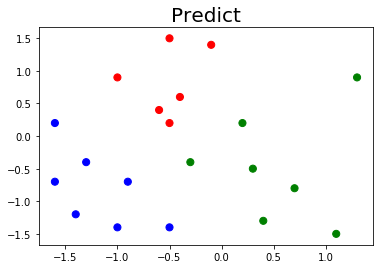

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np



W = tf.Variable(tf.random.normal([2, 3]))
b = tf.Variable(tf.random.normal([3]))
learing_rate = 0.05

for step in range(5001):
    with tf.GradientTape() as tape:
        hypothesis = tf.nn.softmax(tf.matmul(x_data, W) + b)
        #cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_data, logits=hypothesis))
    d_W, d_b = tape.gradient(cost, [W, b])
    W.assign_sub(learing_rate * d_W)
    b.assign_sub(learing_rate * d_b)
    if step % 200 == 0:
            print("step:{}, cost:{}".format(step, cost))

predict = tf.argmax(hypothesis, axis=1, name='predict')
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y_label),tf.float32))
print("Accuracy:{}".format(accuracy))
print(predict)

plt.title('Predict', size=20)
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x_data[:,0], x_data[:,1], s=50, c=colormap[predict.numpy()])
plt.show()